In [1]:
import os, sys
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("univ_by_month.csv")

In [3]:
def load_csv(filename):
    df = pd.read_csv(filename, 
                        header=None, 
                        names=[
                            "open_time",
                            "open",
                            "high",
                            "low",
                            "close",
                            "volume",
                            "close_time",
                            "quote_volume",
                            "n_trades",
                            "taker_buy_base_volume",
                            "taker_buy_quote_volume",
                            "ignore",
                        ])

    df["datetime"] = pd.to_datetime(df["open_time"], unit="ms")
    df.set_index("datetime", inplace=True)
    return df

In [4]:
test_file  = "/Users/chenxu/Work/Crypto/spot/monthly/klines/BTCUSDT/1m/BTCUSDT-1m-2023-09.csv"
test_file2 = "/Users/chenxu/Work/Crypto/spot/monthly/klines/ETHUSDT/1m/ETHUSDT-1m-2023-09.csv"
df  = load_csv(test_file)
df2 = load_csv(test_file2)

<Axes: xlabel='datetime'>

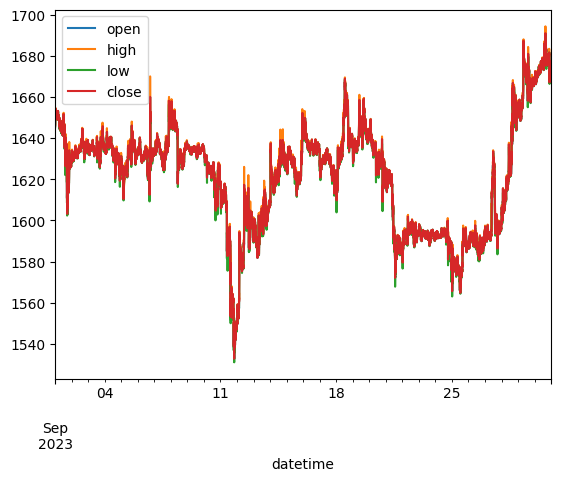

In [5]:
df2[["open", "high", "low", "close"]].plot()

<Axes: xlabel='datetime'>

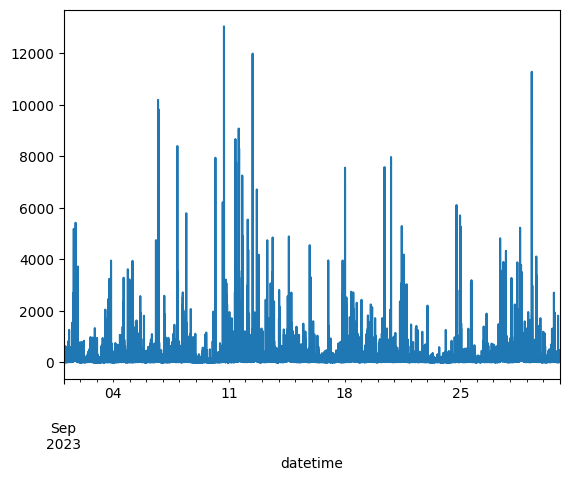

In [6]:
df2["volume"].plot()

In [7]:
import torch
import torch.nn as nn
import inspect

In [8]:
inspect.getfile(nn.Parameter)

'/Users/chenxu/.pyenv/versions/3.11.4/envs/torch/lib/python3.11/site-packages/torch/nn/parameter.py'

In [10]:
rnn = nn.RNNCell(10, 20)
rnn

RNNCell(10, 20)

In [11]:
input = torch.randn(6, 3, 10)
input.shape

torch.Size([6, 3, 10])

In [12]:
hx = torch.randn(3, 20)
hx.shape

torch.Size([3, 20])

In [13]:
output = []
for i in range(6):
    hx = rnn(input[i], hx)
    output += hx,

In [14]:
rnn = nn.LSTMCell(10, 20)
input = torch.randn(2, 3, 10)
hx = torch.randn(3, 20)
cx = torch.randn(3, 20)

In [15]:
output = []
for i in range(input.size()[0]):
    hx, cx = rnn(input[i], (hx, cx))
    output += hx,

output = torch.stack(output, dim=0)
output.shape

torch.Size([2, 3, 20])

In [16]:
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
input = torch.randn(3, 5, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [17]:
output.shape

torch.Size([3, 5, 20])

In [18]:
hn.shape

torch.Size([2, 3, 20])

In [19]:
df2.tail()

,open_time,open,high,low,close,volume,close_time,quote_volume,n_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
datetime,,,,,,,,,,,,
2023-09-30 23:55:00,1696118100000,1671.37,1671.37,1671.25,1671.26,48.4917,1696118159999,81046.622724,135,6.2675,10475.151117,0
2023-09-30 23:56:00,1696118160000,1671.25,1671.26,1671.09,1671.09,20.2627,1696118219999,33862.419648,162,3.0551,5105.486538,0
2023-09-30 23:57:00,1696118220000,1671.10,1671.15,1671.09,1671.14,19.5999,1696118279999,32753.797135,149,15.2181,25431.291998,0
2023-09-30 23:58:00,1696118280000,1671.15,1671.15,1670.91,1670.92,9.4763,1696118339999,15835.407050,125,4.3897,7335.380370,0
2023-09-30 23:59:00,1696118340000,1670.92,1670.92,1670.89,1670.89,29.0351,1696118399999,48514.766334,188,12.0745,20175.385925,0


In [9]:
df_open  = df[["open"]].resample("5T", closed="left", label="left").first()
df2_open = df2[["open"]].resample("5T", closed="left", label="left").first()
# df_open  = df[["open"]]
# df2_open = df2[["open"]]
df_ret  = np.log(df_open).diff().dropna(how="any")
df2_ret = np.log(df2_open).diff().dropna(how="any")

df_ret = pd.DataFrame({
    "BTC": df_ret["open"],
    "ETH": df2_ret["open"],
})


df_price = pd.DataFrame({
    "BTC": df_open["open"],
    "ETH": df2_open["open"],
})

df_ret = np.log(df_price).diff().dropna(how="any")

sym = 'BTC'
df_rets = pd.DataFrame({
    f'{sym}_{i:02d}' : np.log(df_price[sym]).diff().shift(i)
    for i in range(20)
}).dropna(how='any')

In [10]:
df_rets.head()

,BTC_00,BTC_01,BTC_02,BTC_03,BTC_04,BTC_05,BTC_06,BTC_07,BTC_08,BTC_09,BTC_10,BTC_11,BTC_12,BTC_13,BTC_14,BTC_15,BTC_16,BTC_17,BTC_18,BTC_19
datetime,,,,,,,,,,,,,,,,,,,,
2023-09-01 01:40:00,-0.000098,-0.000295,-0.000405,0.000142,-0.000693,0.000678,-0.000745,-0.001057,0.000435,0.000019,-0.000046,0.000555,-0.000166,0.000096,0.000619,0.000056,0.000787,0.000560,0.000357,0.001007
2023-09-01 01:45:00,0.000102,-0.000098,-0.000295,-0.000405,0.000142,-0.000693,0.000678,-0.000745,-0.001057,0.000435,0.000019,-0.000046,0.000555,-0.000166,0.000096,0.000619,0.000056,0.000787,0.000560,0.000357
2023-09-01 01:50:00,-0.000027,0.000102,-0.000098,-0.000295,-0.000405,0.000142,-0.000693,0.000678,-0.000745,-0.001057,0.000435,0.000019,-0.000046,0.000555,-0.000166,0.000096,0.000619,0.000056,0.000787,0.000560
2023-09-01 01:55:00,0.000409,-0.000027,0.000102,-0.000098,-0.000295,-0.000405,0.000142,-0.000693,0.000678,-0.000745,-0.001057,0.000435,0.000019,-0.000046,0.000555,-0.000166,0.000096,0.000619,0.000056,0.000787
2023-09-01 02:00:00,-0.000557,0.000409,-0.000027,0.000102,-0.000098,-0.000295,-0.000405,0.000142,-0.000693,0.000678,-0.000745,-0.001057,0.000435,0.000019,-0.000046,0.000555,-0.000166,0.000096,0.000619,0.000056


In [11]:
def create_inout_sequences(dataframe, seq_length):
    data = dataframe.values
    Xs = []
    Ys = []

    for i in range(len(data) - seq_length - 1):
        X = data[i:i + seq_length]
        Y = data[i + 1:i + seq_length + 1]

        Xs.append(X)
        Ys.append(Y)

    return Xs, Ys

In [12]:
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.X, self.Y = create_inout_sequences(data, seq_length)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [13]:
# train_dataset = TimeSeriesDataset(df_ret[["Spr"]].iloc[:6000], 500)
# valid_dataset = TimeSeriesDataset(df_ret[["Spr"]].iloc[6000:8000], 500)
train_dataset = TimeSeriesDataset(df_rets.iloc[:6000], 200)
valid_dataset = TimeSeriesDataset(df_rets.iloc[6000:8000], 200)

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print(len(train_loader.dataset), len(valid_loader.dataset))

5799 1799


In [15]:
X, y = next(iter(train_loader))

In [17]:
X.shape, y.shape

(torch.Size([32, 200, 20]), torch.Size([32, 200, 20]))

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class PricePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, device, dropout=0.2):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.device = device

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=False)
        # self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)

        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        # self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(self.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(self.device)
        # h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).requires_grad_().to(self.device)
        # c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).requires_grad_().to(self.device)

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.dropout(out[:, -1, :])
        # out = self.dropout(torch.cat((hn[-2, :, :], hn[-1, :, :]), dim=1))
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out


In [70]:
class ProbSparseMultiheadAttention(nn.Module):
    def __init__(self, d_model, n_heads, topk_ratio=0.25):
        super().__init__()
        assert d_model % n_heads == 0, "d_model must be divisible by num_heads"
        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        self.topk_ratio = topk_ratio

        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def split_heads(self, x):
        return x.view(x.size(0), -1, self.n_heads, self.d_k)

    def forward(self, query, key, value, mask=None):
        Q = self.split_heads(self.W_q(query))
        K = self.split_heads(self.W_k(key))
        V = self.split_heads(self.W_v(value))

        attn_scores = torch.einsum("nqhd,nkhd->nhqk", [Q, K]) / (self.d_k ** 0.5)

        top_val, top_idx = attn_scores.topk(int(self.topk_ratio * attn_scores.shape[-1]), sorted=False, dim=-1)
        attn_scores_topk = torch.zeros_like(attn_scores).fill_(-1e20).scatter_(dim=-1, index=top_idx, src=top_val)

        if mask is not None: attn_scores_topk += (mask * -1e9)

        weights = F.softmax(attn_scores_topk, dim=-1)
        attn = torch.einsum("nhql,nlhd->nqhd", [weights, V]).contiguous().view(query.size(0), -1, self.d_model)

        return self.W_o(attn), weights


class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = F.relu
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.fc2(self.dropout(self.relu(self.fc1(x))))


class PositionwiseFeedForward2(nn.Module):
    def __init__(self, d_model, d_ff, kernel_size=1, dropout=0.1):
        super().__init__()
        self.conv1 = nn.Conv1d(d_model, d_ff, kernel_size=kernel_size)
        self.conv2 = nn.Conv1d(d_ff, d_model, kernel_size=kernel_size)
        self.relu = F.relu
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.dropout(self.relu(self.conv1(x)))
        x = self.conv2(x)
        x = x.transpose(1, 2)
        return x


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length=5000):
        super().__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.)) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer("pe", pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [71]:
class ConvLayer(nn.Module):
    def __init__(self, d_model, window_size=3):
        super().__init__()
        self.conv1d = nn.Conv1d(
            in_channels=d_model,
            out_channels=d_model,
            kernel_size=window_size,
            padding=2,
            padding_mode="circular",
        )
        self.norm = nn.BatchNorm1d(d_model)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.conv1d(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        return x.transpose(1, 2)


class EncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, kernel_size=1, dropout=0.1):
        super().__init__()
        self.self_attn = ProbSparseMultiheadAttention(d_model, n_heads)
        # self.feed_forward = PositionwiseFeedForward2(d_model, d_ff, kernel_size, dropout)
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn, weights = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout1(attn))
        ffn = self.feed_forward(x)
        x = self.norm2(x + self.dropout2(ffn))
        return x, weights


class Encoder(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, n_layers, kernel_size=1, dropout=0.1):
        super().__init__()
        self.attn_layers = nn.ModuleList([
            EncoderLayer(d_model, n_heads, d_ff, kernel_size, dropout)
            for _ in range(n_layers)
        ])
        self.conv_layers = nn.ModuleList([ConvLayer(d_model) for _ in range(n_layers - 1)])
        self.norm = nn.LayerNorm(d_model)
        self.pos_encoder = PositionalEncoding(d_model)

    def forward(self, x, mask):
        x = self.pos_encoder(x)
        attns = []
        for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
            x, weights = attn_layer(x, mask)
            x = conv_layer(x)
            attns += weights,

        x, weights = self.attn_layers[-1](x, mask)
        attns += weights,

        return self.norm(x), attns


In [72]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, kernel_size=1, dropout=0.1):
        super().__init__()
        self.self_attn  = ProbSparseMultiheadAttention(d_model, n_heads)
        self.cross_attn = ProbSparseMultiheadAttention(d_model, n_heads)
        self.feed_forward = PositionwiseFeedForward2(d_model, d_ff, kernel_size, dropout)
        # self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)

    def forward(self, x, memory, x_mask, memory_mask):
        attn_x, weights_x = self.self_attn(x, x, x, x_mask)
        x = self.norm1(x + self.dropout1(attn_x))
        attn_memory, weights_memory = self.cross_attn(x, memory, memory, memory_mask)
        x = self.norm2(x + self.dropout2(attn_memory))
        ffn = self.feed_forward(x)
        x = self.norm3(x + self.dropout3(ffn))
        return x, weights_x, weights_memory


class Decoder(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, n_layers, kernel_size=1, dropout=0.1):
        super().__init__()
        self.layers = nn.ModuleList([
            DecoderLayer(d_model, n_heads, d_ff, kernel_size, dropout)
            for _ in range(n_layers)
        ])
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x, memory, x_mask, memory_mask=None):
        for layer in self.layers:
            x, _, _ = layer(x, memory, x_mask, memory_mask)
        return self.norm(x)


class SimpleInformer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, n_layers, output_dim, kernel_size=1, dropout=0.1):
        super().__init__()
        self.encoder = Encoder(d_model, n_heads, d_ff, n_layers, kernel_size, dropout)
        self.decoder = Decoder(d_model, n_heads, d_ff, n_layers, kernel_size, dropout)
        self.fc = nn.Linear(d_model, output_dim)

    def forward(self, x, y, x_mask, y_mask=None):
        memory, _ = self.encoder(x, None)
        output = self.decoder(y, memory, x_mask, y_mask)
        return self.fc(output)
        # return self.fc(memory)
        # return output

In [73]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [76]:
# model = PricePredictor(1, 64, 2, 1, device, 0.2)
mask = torch.triu(torch.ones((200, 200)), diagonal=1).bool().to(device)
model = SimpleInformer(20, 1, 16, 3, 1).to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [77]:
X, y = next(iter(train_loader))
X, y = X.float().to(device), y.float().to(device)

In [78]:
X.shape

torch.Size([32, 200, 20])

In [79]:
y_pred = model(X, y, mask)

In [80]:
y_delta = y[:, -1, :] - y[:, -2, :]
y_pred_delta = y_pred[:, -1, :] - y_pred[:, -2, :]

In [81]:
(torch.sign(y_delta[:, 0]) == torch.sign(y_pred_delta.squeeze(-1))).sum().item()

13

In [82]:
torch.sign(y_pred[:, -1, 0])

tensor([-1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        -1.,  1.,  1., -1.], device='mps:0', grad_fn=<SignBackward0>)

In [83]:
torch.sign(y[:, -1, 0])

tensor([ 1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
         1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1.,  1.,  1., -1.], device='mps:0')

In [84]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(
    model: nn.Module,
    dataloader: DataLoader,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    device: torch.device) -> Tuple[float, float]:

    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.float().to(device), y.float().to(device)
        y_pred = model(X, y, mask)
        # loss = loss_fn(y_pred[:, -1, :], y[:, -1, :])
        # loss = loss_fn(y_pred, y[:, :, 0].unsqueeze(-1))
        loss = loss_fn(y_pred[:, :, 0], y[:, :, 0])
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_delta = y[:, -1, :] - y[:, -2, :]
        y_pred_delta = y_pred[:, -1, :] - y_pred[:, -2, :]

        # train_acc += (torch.sign(y_delta) == torch.sign(y_pred_delta)).all(axis=1).sum().item() / len(y_pred)
        # train_acc += (torch.sign(y_delta[:, 0]) == torch.sign(y_pred_delta.squeeze(-1))).sum().item() / len(y_pred)
        train_acc += (torch.sign(y_pred[:, -1, 0]) == torch.sign(y[:, -1, 0])).sum().item() / len(y_pred)

    train_loss /= len(dataloader)
    train_acc  /= len(dataloader)
    return train_loss, train_acc

def test_step(
    model: nn.Module,
    dataloader: DataLoader,
    loss_fn: nn.Module,
    device: torch.device) -> Tuple[float, float]:

    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.float().to(device), y.float().to(device)
            y_pred = model(X, y, mask)

            # loss = loss_fn(y_pred[:, -1, :], y[:, -1, :])
            # loss = loss_fn(y_pred, y[:, :, 0].unsqueeze(-1))
            loss = loss_fn(y_pred[:, :, 0], y[:, :, 0])
            test_loss += loss.item()

            y_delta = y[:, -1, :] - y[:, -2, :]
            y_pred_delta = y_pred[:, -1, :] - y_pred[:, -2, :]

            # test_acc += (torch.sign(y_delta) == torch.sign(y_pred_delta)).all(axis=1).sum().item() / len(y_pred)
            # test_acc += (torch.sign(y_delta[:, 0]) == torch.sign(y_pred_delta.squeeze(-1))).sum().item() / len(y_pred)
            test_acc += (torch.sign(y_pred[:, -1, 0]) == torch.sign(y[:, -1, 0])).sum().item() / len(y_pred)

    test_loss /= len(dataloader)
    test_acc  /= len(dataloader)
    return test_loss, test_acc

        

In [93]:
def train(
    model: nn.Module,
    train_dataloader: DataLoader,
    test_dataloader: DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: nn.Module,
    epochs: int,
    device: torch.device) -> Dict[str, List]:

    results = {
        "train_loss": [],
        "train_acc":  [],
        "test_loss":  [],
        "test_acc":   [],
    }

    model.to(device)

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device)

        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)

        if (epoch + 1) % 10 == 0:
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.4f} | "
                f"train_acc:  {train_acc:.4f}  | "
                f"test_loss:  {test_loss:.4f} | "
                f"test_acc:   {test_acc:.4f} | "
            )


        results["train_loss"] += train_loss,
        results["train_acc"]  += train_acc,
        results["test_loss"]  += test_loss,
        results["test_acc"]   += test_acc,

    return results


def plot_results(results: Dict[str, List]) -> None:
    keys = ["train_loss", "train_acc", "test_loss", "test_acc"]
    for k in keys:
        if k not in results:
            print(f"{k} doesn't exist!")
            return

    epoch_list = list(range(len(results[keys[0]])))
    results['idx'] = epoch_list

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    lns1 = ax1.plot(epoch_list, results["train_loss"], label="Train Loss")
    lns2 = ax1.plot(epoch_list, results["test_loss"], label="Test Loss")
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Accuracy")
    lns3 = ax2.plot(epoch_list, results["train_acc"], color='green', label="Train Acc")
    lns4 = ax2.plot(epoch_list, results["test_acc"], color='red', label="Test Acc")

    lns = lns1 + lns2 + lns3 + lns4
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs)

    plt.show()


 10%|█         | 10/100 [03:12<28:22, 18.91s/it]

Epoch: 10 | train_loss: 0.0003 | train_acc:  0.5016  | test_loss:  0.0000 | test_acc:   0.4803 | 


 20%|██        | 20/100 [06:20<25:05, 18.82s/it]

Epoch: 20 | train_loss: 0.0001 | train_acc:  0.5012  | test_loss:  0.0000 | test_acc:   0.4803 | 


 30%|███       | 30/100 [09:29<21:57, 18.82s/it]

Epoch: 30 | train_loss: 0.0000 | train_acc:  0.4988  | test_loss:  0.0000 | test_acc:   0.4803 | 


 40%|████      | 40/100 [12:42<19:57, 19.96s/it]

Epoch: 40 | train_loss: 0.0000 | train_acc:  0.4967  | test_loss:  0.0000 | test_acc:   0.4803 | 


 50%|█████     | 50/100 [16:11<17:28, 20.96s/it]

Epoch: 50 | train_loss: 0.0000 | train_acc:  0.5018  | test_loss:  0.0000 | test_acc:   0.4803 | 


 60%|██████    | 60/100 [19:41<13:59, 20.98s/it]

Epoch: 60 | train_loss: 0.0000 | train_acc:  0.4945  | test_loss:  0.0000 | test_acc:   0.4803 | 


 70%|███████   | 70/100 [23:09<10:19, 20.64s/it]

Epoch: 70 | train_loss: 0.0000 | train_acc:  0.5111  | test_loss:  0.0000 | test_acc:   0.4803 | 


 80%|████████  | 80/100 [26:35<06:52, 20.63s/it]

Epoch: 80 | train_loss: 0.0000 | train_acc:  0.4901  | test_loss:  0.0000 | test_acc:   0.4803 | 


 90%|█████████ | 90/100 [30:02<03:27, 20.72s/it]

Epoch: 90 | train_loss: 0.0000 | train_acc:  0.4842  | test_loss:  0.0000 | test_acc:   0.4803 | 


100%|██████████| 100/100 [33:28<00:00, 20.09s/it]

Epoch: 100 | train_loss: 0.0000 | train_acc:  0.5022  | test_loss:  0.0000 | test_acc:   0.4803 | 


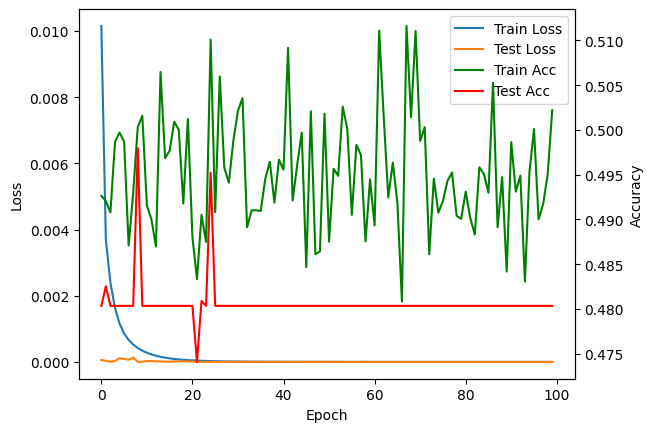

In [86]:
results = train(
            model=model,
            train_dataloader=train_loader,
            test_dataloader=valid_loader,
            loss_fn=loss_function,
            optimizer=optimizer,
            epochs=100,
            device=device)

plot_results(results)